In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt
%matplotlib inline
style.use('fivethirtyeight')

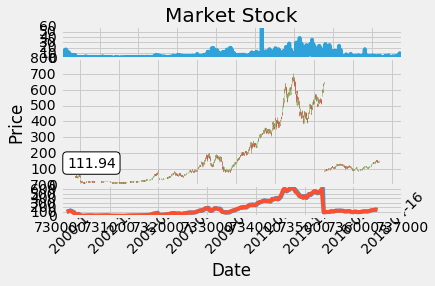

In [9]:
MA1 = 10
MA2 = 30

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data():
    
   
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title('Market Stock')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
    
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[2:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    # pprint.pprint(stock_data)
    date, openp, highp, lowp, closep, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      # %Y = full year. 2015
                                                                      # %y = partial year 15
                                                                      # %m = number month
                                                                      # %d = number day
                                                                      # %H = hours
                                                                      # %M = minutes
                                                                      # %S = seconds
                                                                      # 12-06-2014
                                                                      # %m-%d-%Y
                                                                      converters={0: bytespdate2num('%Y-%m-%d')})

    
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    start = len(date[MA2-1:])

    h_l = list(map(high_minus_low, highp, lowp))

    ax1.plot_date(date,h_l,'-')


    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)
 
    
##    # Annotation example with arrow
##    ax2.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax2.text(date[10], closep[1],'Text Example', fontdict=font_dict)



    ax3.plot(date[-start:], ma1[-start:])
    ax3.plot(date[-start:], ma2[-start:])


    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data()
